In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import torch

In [3]:
df_1 = pd.read_csv('./datasets/amazon_reviews_1/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [3]:
df_1.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [4]:
df_1['reviews.text'].loc[10]

"I find amazon basics batteries to be equal if not superior to name brand ones. Can't believe I didn't start buying them sooner! The packages are large and the price is great too."

In [5]:
df_1_categories = df_1.categories + ',' + df_1.primaryCategories

df_1_categories_counter = Counter()

for x in df_1_categories.str.split(','):
    df_1_categories_counter += Counter(x)

df_1_categories_counter

Counter({'Electronics': 43118,
         'Health': 24142,
         'Computers & Tablets': 15378,
         'Tablets': 15231,
         'Fire Tablets': 14396,
         'Amazon Tablets': 14396,
         'Accessories': 12144,
         'AA': 12071,
         'AAA': 12071,
         'Health & Household': 12071,
         'Camcorder Batteries': 12071,
         'Camera & Photo': 12071,
         'Batteries': 12071,
         'Household Batteries': 12071,
         'Camera Batteries': 12071,
         'Health and Beauty': 12071,
         'Household Supplies': 12071,
         'Batteries & Chargers': 12071,
         ' Household & Baby Care': 12071,
         'Health Personal Care': 12071,
         'Health & Beauty': 12071,
         'All Tablets': 11578,
         'Electronics Features': 9168,
         'Robot Check': 8343,
         'iPad & Tablets': 7107,
         'Computers/Tablets & Networking': 5195,
         'Tablets & eBook Readers': 5003,
         ' Tech Toys': 3702,
         ' Movies': 3702,
         

In [6]:
df_1_categories_with_count = pd.DataFrame(data=df_1_categories_counter.items(), columns=['category', 'count'])

df_1_categories_with_count = df_1_categories_with_count.sort_values(by=['count'], ascending=False)

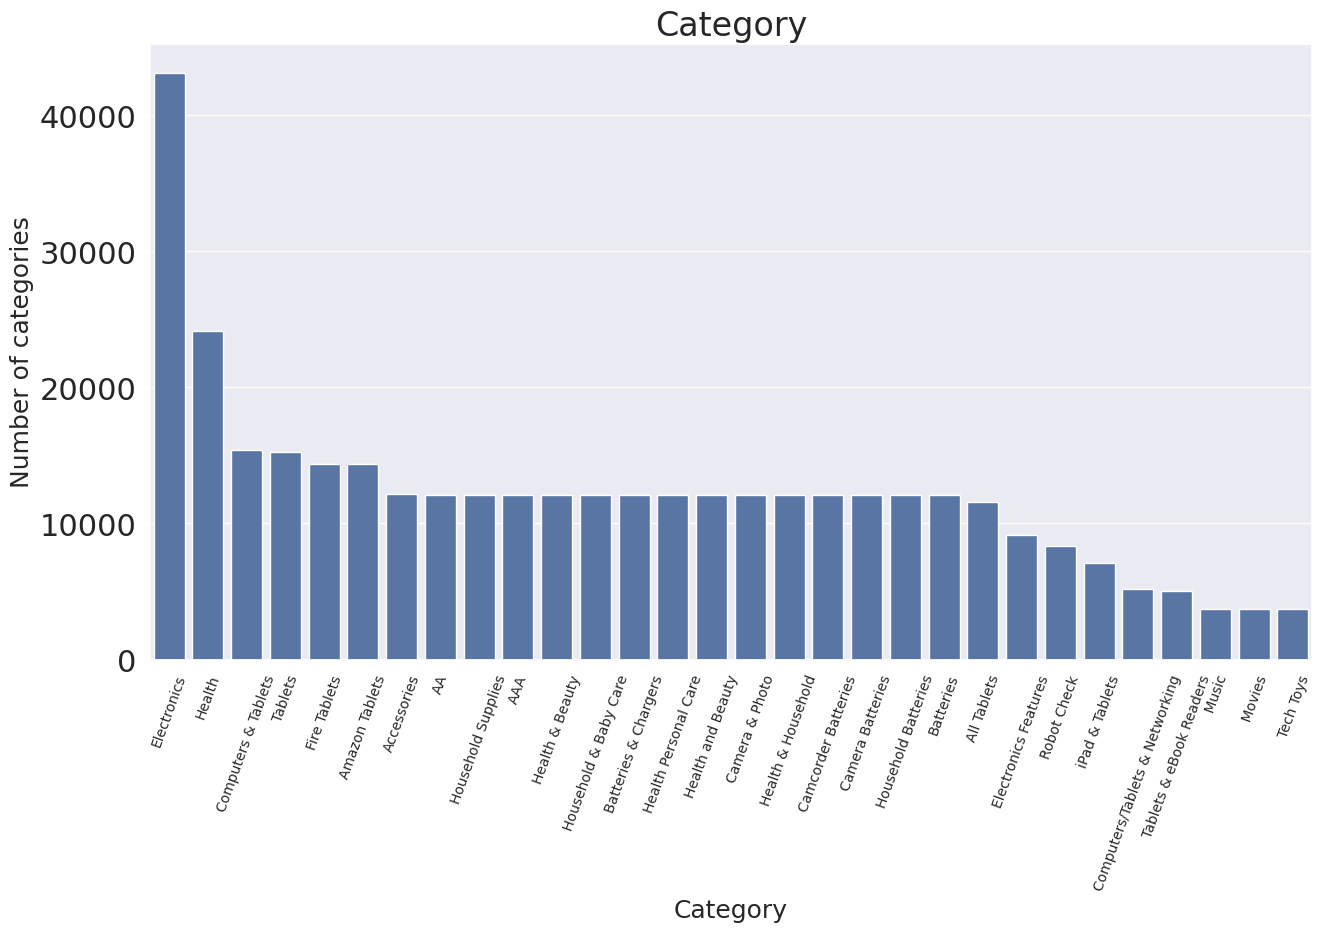

In [7]:
sns.set(font_scale=2)
plt.figure(figsize=(15,8))

# display first 30 categories
ax = sns.barplot(df_1_categories_with_count[:30], x='category', y='count')

plt.xticks(rotation=70, fontsize=10)
plt.title("Category", fontsize=24)
plt.ylabel('Number of categories', fontsize=18)
plt.xlabel('Category', fontsize=18)

plt.show()

### ----------------------------------------------------------------------------------------------------------

In [10]:
df_2 = pd.read_csv('./datasets/retail_products_classification/train.csv')

In [11]:
df_2

,ImgId,title,description,categories
0,B000HYL1V6,TUNGSTEN SOLDER PICK WITH HANDLE,Solder Pick for picking up molten solder when ...,"Arts, Crafts & Sewing"
1,B00006HXWY,Write Right 98167 Screen Protector for Sony T615C,We all screen. And we all need to protect thos...,Cell Phones & Accessories
2,B000GAWSBS,Casio Mens DBC310-1 Databank 300 Digital Watch...,"Bringing you precision at a glance, the Casio ...","Clothing, Shoes & Jewelry"
3,B000040JOL,Factory-Reconditioned DEWALT DW260KR Heavy-Dut...,Factory-Reconditioned DEWALT DW260KR Heavy-Dut...,Tools & Home Improvement
4,B00006IB78,Energizer 2 in 1 Light,This twoway light features a bright flashlight...,Health & Personal Care
...,...,...,...,...
46224,B0000AV1J7,"Berkley Trilene XL 1000 - yard Fishing Line, C...",Smooth - casting Berkley Trilene XL Fishing Li...,Sports & Outdoors
46225,B0006MZPLG,Badger Air-Brush Company Basic Spray Gun Set,"An easy to use, top quality spray gun for the ...","Arts, Crafts & Sewing"
46226,B000GBO8SS,Fimo Soft Polymer Clay 2 Ounces-8020-53 Tropic...,Fimo Soft Polymer Clay is easier to use than b...,"Arts, Crafts & Sewing"
46227,B0000VMA16,Wilton Icing Colors 1 Oz: Rose Petal,Icing Colors. This plastic bottle contains 1 o...,Grocery & Gourmet Food


In [10]:
df_2_categories_counter = Counter()

for x in df_2['categories'].str.split(','):
    df_2_categories_counter += Counter(x)

df_2_categories_counter

Counter({'Arts': 2225,
         ' Crafts & Sewing': 2225,
         'Beauty': 2202,
         'Sports & Outdoors': 2201,
         'Grocery & Gourmet Food': 2201,
         'Cell Phones & Accessories': 2200,
         'Clothing': 2200,
         ' Shoes & Jewelry': 2200,
         'Tools & Home Improvement': 2200,
         'Health & Personal Care': 2200,
         'Baby Products': 2200,
         'Baby': 2200,
         'Patio': 2200,
         ' Lawn & Garden': 2200,
         'Electronics': 2200,
         'All Electronics': 2200,
         'Automotive': 2200,
         'Toys & Games': 2200,
         'All Beauty': 2200,
         'Office Products': 2200,
         'Appliances': 2200,
         'Musical Instruments': 2200,
         'Industrial & Scientific': 2200,
         'Pet Supplies': 2200})

In [11]:
df_2_categories_with_count = pd.DataFrame(data=df_2_categories_counter.items(), columns=['category', 'count'])

df_2_categories_with_count = df_2_categories_with_count.sort_values(by=['count'], ascending=False)

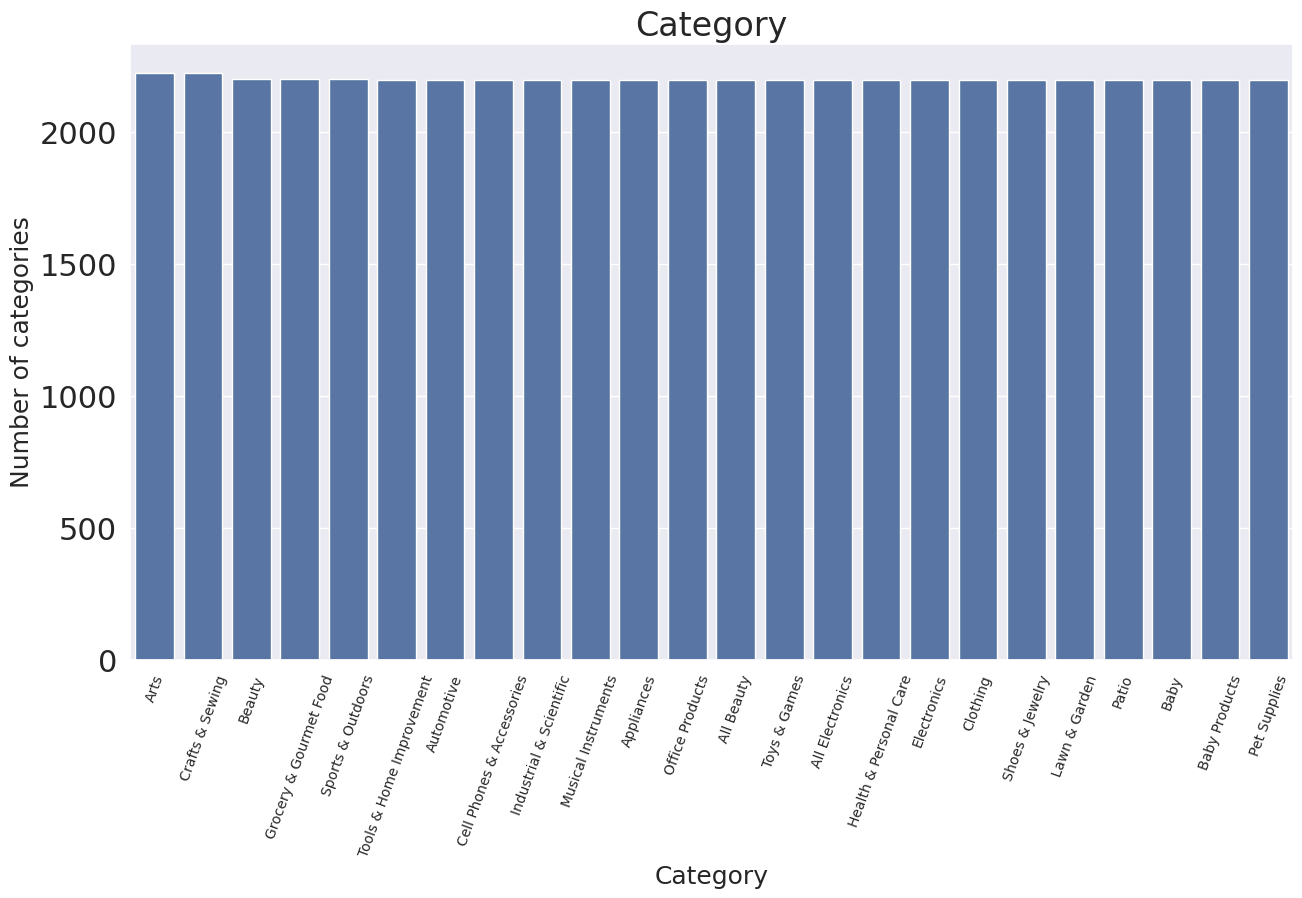

In [12]:
sns.set(font_scale=2)
plt.figure(figsize=(15,8))

# display first 30 categories
ax = sns.barplot(df_2_categories_with_count, x='category', y='count')

plt.xticks(rotation=70, fontsize=10)
plt.title("Category", fontsize=24)
plt.ylabel('Number of categories', fontsize=18)
plt.xlabel('Category', fontsize=18)

plt.show()

### ----------------------------------------------------------------------------------------------------------

In [2]:
df_3 = pd.read_csv('./datasets/ecommerce_text_classification/titles_to_categories.csv')

df_3.head()

,title,category_name
0,"Green Leaf WW3D Wonder Extension Cord Winder, ...",Industrial Scientific
1,8pcs Toilet Seat Bumpers Universal Toilet Repl...,Industrial Scientific
2,YaeCCC 19 Pcs Hole Saw Kit 3/4''(19mm)- 6''(15...,Industrial Scientific
3,LLPT Butyl Putty Tape White 1 Inch x 33Ft Tigh...,Industrial Scientific
4,"Lightbeam 16"" Long Stem Deep Fry Thermometer w...",Industrial Scientific


In [4]:
df_3_unique_categories = set()

for i, x in df_3.iterrows():
    final_category = []
    splitted = x['category_name'].split()
    for index, split in enumerate(splitted):
        if split == '&':
    df_3_unique_categories.add()

{'3D Printers',
 '3D Printing  Scanning',
 '3D Printing & Scanning',
 'Abrasive  Finishing Products',
 'Abrasive & Finishing Products',
 'Accessories & Supplies',
 'Action Cameras',
 'Action Figures, Maquettes  Busts',
 'Action Sports',
 'Adapters',
 'Additive Manufacturing Products',
 'Agricultural Equipment & Supplies',
 'Air Freshener Supplies',
 'Alexa Built-In Devices',
 'Art & Craft Supplies',
 'Arts  Crafts Supplies',
 'Arts & Crafts',
 'Arts & Crafts Supplies',
 'Arts, Crafts & Sewing Storage',
 'Artwork',
 'Audio/Video Receivers  Amplifiers',
 'Automotive',
 'Automotive Care',
 'Automotive Enthusiast Merchandise',
 'Automotive Exterior Accessories',
 'Automotive Interior Accessories',
 'Automotive Paint & Paint Supplies',
 'Automotive Performance Parts & Accessories',
 'Automotive Replacement Parts',
 'Automotive Tires  Wheels',
 'Automotive Tires & Wheels',
 'Automotive Tools  Equipment',
 'Automotive Tools & Equipment',
 'Awards',
 'Baby',
 'Baby  Child Care Products',
 'Bab

In [5]:
df_3_unique_categories

{'3D Printers',
 '3D Printing  Scanning',
 '3D Printing & Scanning',
 'Abrasive  Finishing Products',
 'Abrasive & Finishing Products',
 'Accessories & Supplies',
 'Action Cameras',
 'Action Figures, Maquettes  Busts',
 'Action Sports',
 'Adapters',
 'Additive Manufacturing Products',
 'Agricultural Equipment & Supplies',
 'Air Freshener Supplies',
 'Alexa Built-In Devices',
 'Art & Craft Supplies',
 'Arts  Crafts Supplies',
 'Arts & Crafts',
 'Arts & Crafts Supplies',
 'Arts, Crafts & Sewing Storage',
 'Artwork',
 'Audio/Video Receivers  Amplifiers',
 'Automotive',
 'Automotive Care',
 'Automotive Enthusiast Merchandise',
 'Automotive Exterior Accessories',
 'Automotive Interior Accessories',
 'Automotive Paint & Paint Supplies',
 'Automotive Performance Parts & Accessories',
 'Automotive Replacement Parts',
 'Automotive Tires  Wheels',
 'Automotive Tires & Wheels',
 'Automotive Tools  Equipment',
 'Automotive Tools & Equipment',
 'Awards',
 'Baby',
 'Baby  Child Care Products',
 'Bab

In [154]:
df_3_categories_counter = Counter()

for x in df_3['category_name'].str.split(','):
    df_3_categories_counter += Counter(x)

df_3_categories_counter

Counter({'Sports & Outdoors': 720050,
         'Baby': 36154,
         "Men's Shoes": 32143,
         "Women's Handbags": 29934,
         "Women's Shoes": 28668,
         'Handmade Jewellery': 28666,
         "Men's Watches": 28483,
         'Boys': 27897,
         'Handmade Artwork': 27358,
         "Women's Jewelry": 26481,
         'Handmade Clothing': 26345,
         "Men's Accessories": 26067,
         'Women': 25349,
         'Hair Care': 25258,
         'Beauty': 24404,
         'Men': 23235,
         'Grocery': 22912,
         ' Consoles & Accessories': 22740,
         "Men's Clothing": 22701,
         'Handmade Home Décor': 22245,
         'Data Storage': 22054,
         "Women's Clothing": 21859,
         "Women's Watches": 21718,
         'Luggage  Travel Gear': 21444,
         "Women's Accessories": 20998,
         "Girls' Clothing": 20949,
         'Girls': 20805,
         'Building Supplies': 19821,
         'Toys & Games': 18990,
         'Automotive Replacement Parts': 

In [155]:
df_3_categories_with_count = pd.DataFrame(data=df_3_categories_counter.items(), columns=['category', 'count'])

df_3_categories_with_count = df_3_categories_with_count.sort_values(by=['count'], ascending=False)

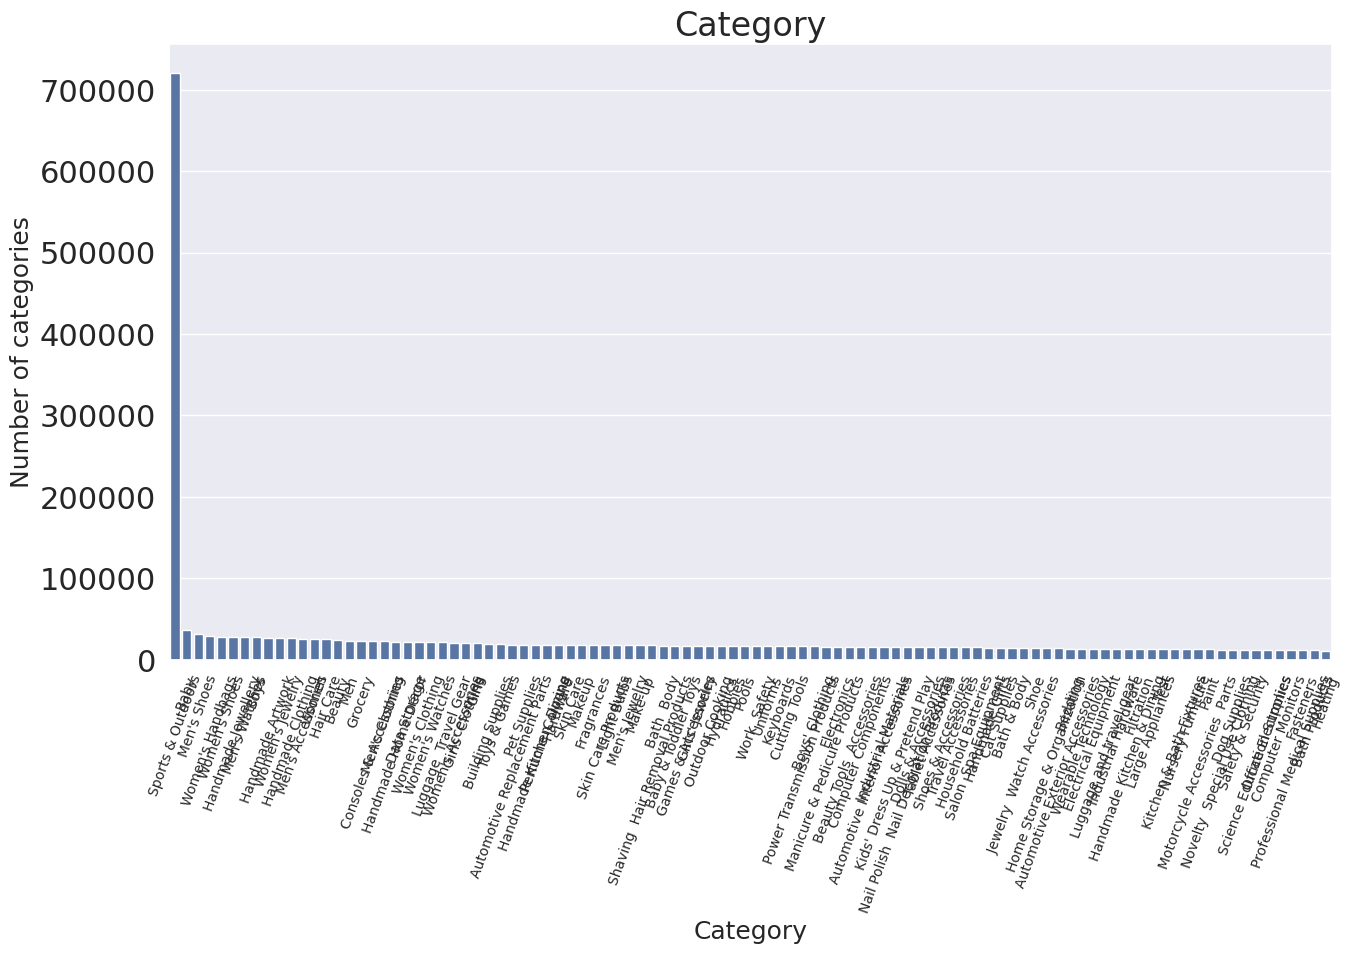

In [157]:
sns.set(font_scale=2)
plt.figure(figsize=(15,8))

# display first 30 categories
ax = sns.barplot(df_3_categories_with_count[:100], x='category', y='count')

plt.xticks(rotation=70, fontsize=10)
plt.title("Category", fontsize=24)
plt.ylabel('Number of categories', fontsize=18)
plt.xlabel('Category', fontsize=18)

plt.show()

### ----------------------------------------------------------------------------------------------------------

In [1]:
df_4 = pd.read_csv('./datasets/luxury_apparel_data/Luxury_Products_Apparel_Data.csv')

df_4.head()

NameError: name 'pd' is not defined

### ----------------------------------------------------------------------------------------------------------

In [14]:
df_5 = pd.read_csv('./datasets/Walmart Product Data 2019/marketing_sample_for_walmart_com-ecommerce__20191201_20191231__30k_data.csv')

In [67]:
df_5.head()

,Uniq Id,Crawl Timestamp,Product Url,Product Name,Description,List Price,Sale Price,Brand,Item Number,Gtin,Package Size,Category,Postal Code,Available
0,019b67ef7f01103d8fb0a53e4c36daa7,2019-12-18 10:20:52 +0000,https://www.walmart.com/ip/La-Costena-Chipotle...,"La Costena Chipotle Peppers, 7 OZ (Pack of 12)",We aim to show you accurate product informati...,31.93,31.93,La Costeï¿½ï¿½a,NaN,139941530,NaN,"Food | Meal Solutions, Grains & Pasta | Canned...",NaN,True
1,3a4ff306dcc8a6e2bf720964d29b84c3,2019-12-18 17:21:48 +0000,https://www.walmart.com/ip/Equate-Triamcinolon...,Equate Triamcinolone Acetonide Nasal Allergy S...,We aim to show you accurate product informati...,10.48,10.48,Equate,569045548.0,632775553,NaN,Health | Equate | Equate Allergy | Equate Sinu...,NaN,True
2,80090549d7d176327b186353c7b28ca4,2019-12-18 17:46:41 +0000,https://www.walmart.com/ip/AduroSmart-ERIA-Sof...,AduroSmart ERIA Soft White Smart A19 Light Bul...,We aim to show you accurate product informati...,10.99,10.99,AduroSmart ERIA,568068849.0,281487005,NaN,Electronics | Smart Home | Smart Energy and Li...,NaN,True
3,151ee1c61a29bacfedb01cd500494b2f,2019-12-18 22:14:22 +0000,https://www.walmart.com/ip/24-Classic-Adjustab...,"24"" Classic Adjustable Balloon Fender Set Chro...",We aim to show you accurate product informati...,38.59,38.59,lowrider,NaN,133714060,NaN,Sports & Outdoors | Bikes | Bike Accessories |...,NaN,True
4,7b2ef8d41f65df121f6b4b9828cf8dad,2019-12-18 06:56:02 +0000,https://www.walmart.com/ip/Elephant-Shape-Sili...,Elephant Shape Silicone Drinkware Portable Sil...,We aim to show you accurate product informati...,5.81,5.81,Anself,NaN,104042139,NaN,Baby | Feeding | Sippy Cups: Alternatives to P...,NaN,True


In [69]:
df_5['Category'].str.split('|').str.len().value_counts()

Category
4.0    12510
3.0    11569
5.0     5384
6.0      259
2.0      258
7.0        3
Name: count, dtype: int64

In [77]:
df_5_categories_counter = Counter()

for x in df_5['Category'].str.split('|'):
    df_5_categories_counter += Counter(x)

df_5_categories_counter

TypeError: 'float' object is not iterable

### ----------------------------------------------------------------------------------------------------------